a. Potencia a 35 mph (Lagrange): 517.4717698245457 W
b. Potencia a 33 mph (Newton): 719 W


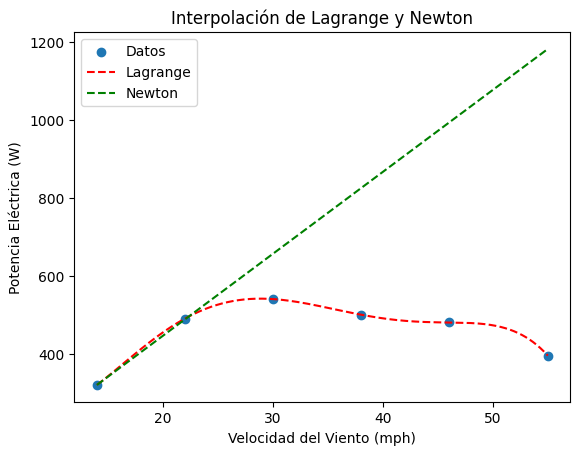

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del experimento
velocidades = np.array([14, 22, 30, 38, 46, 55])
potencia_electrica = np.array([320, 490, 540, 500, 480, 395])

# Método de interpolación de Lagrange
def lagrange_interpolation(x, x_values, y_values):
    result = 0
    n = len(x_values)
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if j != i:
                term = term * (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

# Método de interpolación de Newton
def newton_interpolation(x, x_values, y_values):
    n = len(x_values)
    coefficients = y_values.copy()

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coefficients[i] = (coefficients[i] - coefficients[i-1]) / (x_values[i] - x_values[i-j])

    result = coefficients[-1]
    for i in range(n-2, -1, -1):
        result = result * (x - x_values[i]) + coefficients[i]

    return result

# a. Polinomio de Lagrange y potencia a 35 mph
velocidad_evaluar_a = 35
potencia_lagrange_a = lagrange_interpolation(velocidad_evaluar_a, velocidades, potencia_electrica)
print(f"a. Potencia a {velocidad_evaluar_a} mph (Lagrange): {potencia_lagrange_a} W")

# b. Polinomio de Newton y potencia a 33 mph
velocidad_evaluar_b = 33
potencia_newton_b = newton_interpolation(velocidad_evaluar_b, velocidades, potencia_electrica)
print(f"b. Potencia a {velocidad_evaluar_b} mph (Newton): {potencia_newton_b} W")

# Valores para graficar
velocidades_grafica = np.linspace(min(velocidades), max(velocidades), 1000)
potencia_lagrange_grafica = [lagrange_interpolation(v, velocidades, potencia_electrica) for v in velocidades_grafica]
potencia_newton_grafica = [newton_interpolation(v, velocidades, potencia_electrica) for v in velocidades_grafica]

# Gráfico de los datos y los polinomios interpoladores
plt.scatter(velocidades, potencia_electrica, label='Datos')
plt.plot(velocidades_grafica, potencia_lagrange_grafica, label='Lagrange', linestyle='--', color='red')
plt.plot(velocidades_grafica, potencia_newton_grafica, label='Newton', linestyle='--', color='green')
plt.xlabel('Velocidad del Viento (mph)')
plt.ylabel('Potencia Eléctrica (W)')
plt.title('Interpolación de Lagrange y Newton')
plt.legend()
plt.show()
